<div style="text-align: center; font-size: 16px;">
    <strong>Course:</strong> Machine Learning Operations |
    <strong>Lecturer:</strong> Prof. Dr. Klotz |
    <strong>Date:</strong> 17.05.2025 |
    <strong>Name:</strong> Sofie Pischl
</div>

# <center> Data Exploration </center>

# Inhaltsverzeichnis
1. [Einleitung](#Einleitung)
2. [Datenvorbereitung](#Datenvorbereitung)
3. [Fortgeschrittenes Topic Modelling mit BERTopic](#Fortgeschrittenes-Topic-Modelling-mit-BERTopic)
4. [Verbesserte Sentiment-Analyse](#Verbesserte-Sentiment-Analyse)
5. [Zeitliche Analyse der Topics](#Zeitliche-Analyse-der-Topics)
6. [UMAP-Visualisierung der Topics](#UMAP-Visualisierung-der-Topics)
7. [Vorbereitung auf Klassifikation](#Vorbereitung-auf-Klassifikation)


## Einleitung
Dieses Notebook untersucht kombinierte Social-Media-Daten aus Reddit, YouTube und TikTok. Ziel ist es, Muster in Themen und Stimmungen zu erkennen und die Daten für eine spätere Klassifikation vorzubereiten. Wir verwenden moderne Methoden wie **BERTopic**, **Transformer-basierte Sentimentanalyse** und **visuelle Embedding-Cluster**.

In diesem Notebook bauen wir auf der bisherigen Datenexploration auf und ergänzen folgende moderne Verfahren:

1. **Fortgeschrittenes Topic Modelling mit BERTopic**
2. **Verbesserte Sentiment-Analyse mit VADER und Transformer-Modell**
3. **Detaillierte Exploration von Text-Clustern und Zeitreihen**
4. **Vorbereitung für Klassifikation und Vorhersagemodelle**

Jede Methode wird durch beschreibenden Text begleitet und in das bestehende Datenformat integriert.

## Datenvorbereitung
Wir laden die vorverarbeiteten Daten, konvertieren Zeitstempel und bereiten die Texte für die Analyse vor.

In [2]:
import pandas as pd
pd.set_option('display.max_columns', 1000)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
import nltk
from pathlib import Path

In [3]:
BASE_DIR = Path().resolve().parent
RAW_DIR = (BASE_DIR / "./data/processed").resolve()

# Datei laden
df = pd.read_csv(RAW_DIR / "social_media_data.csv")

display(df.head())
df.info()

,source,id,title,text,username,likes,comments,shares,plays,timestamp,published_at,url,title_language,title_clean,title_char_count,title_word_count,title_uppercase_count,title_exclamation_count,title_question_count,title_emoji_count,title_mention_count,title_hashtag_count,title_avg_word_length,title_sentiment,title_sentiment_score,text_language,text_clean,text_char_count,text_word_count,text_uppercase_count,text_exclamation_count,text_question_count,text_emoji_count,text_mention_count,text_hashtag_count,text_avg_word_length,text_sentiment,text_sentiment_score,engagement_rate,hour,weekday,year,month,day_period,is_weekend
0,tiktok,7492000423641959685,NaN,#CapCut #قوالب_كاب_كات_جاهزه_للتصميم__🌴♥ #كاب_...,noordeen_cap_cat_0_1,0.001497,0.000989,0.000181,0.003962,1744367290,2025-05-12 13:56:20,https://webapp-va.tiktok.com/6508d64d970e751a2...,unknown,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,neutral,0.0,unknown,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,neutral,0.0,0.121036,13.0,Monday,2025.0,5.0,afternoon,False
1,tiktok,7461927005689302280,NaN,welcome to the thanos world!! #squidgame #squi...,team_thanos_player230,0.006703,0.028503,0.001095,0.037793,1737365272,2025-05-12 13:56:20,https://webapp-sg.tiktok.com/bf63b8aa40b9ff0ca...,unknown,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,neutral,0.0,en,welcome thanos world,20.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,positive,0.8,0.059165,13.0,Monday,2025.0,5.0,afternoon,False
2,tiktok,7461757350492278048,NaN,This is a great goal 😳😭 @Fabio Andrés #golazo ...,risingballers,0.022272,0.012754,0.026598,0.033222,1737325774,2025-05-12 13:56:20,https://v16-webapp-prime.tiktok.com/video/tos/...,unknown,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,neutral,0.0,en,great goal andrés,17.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,positive,0.8,0.214484,13.0,Monday,2025.0,5.0,afternoon,False
3,tiktok,7462429961345879318,NaN,glaube er hatte nicht so bock auf mich..💀 #for...,allroundii,0.017508,0.015076,0.018989,0.031088,1737482377,2025-05-12 13:56:20,NaN,unknown,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,neutral,0.0,de,glaube bock,11.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,neutral,0.0,0.180779,13.0,Monday,2025.0,5.0,afternoon,False
4,tiktok,7477658166235286791,NaN,#mascotas #humormascotas😂😂 #mascotastiktok #vi...,rokopitbull,0.387179,0.085289,0.252874,0.310576,1741027969,2025-05-12 13:56:20,https://v16-webapp-prime.tiktok.com/video/tos/...,unknown,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,neutral,0.0,unknown,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,neutral,0.0,0.397213,13.0,Monday,2025.0,5.0,afternoon,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 45 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   source                   2205 non-null   object 
 1   id                       2205 non-null   object 
 2   title                    778 non-null    object 
 3   text                     2204 non-null   object 
 4   username                 1821 non-null   object 
 5   likes                    2205 non-null   float64
 6   comments                 2205 non-null   float64
 7   shares                   2205 non-null   float64
 8   plays                    2205 non-null   float64
 9   timestamp                2205 non-null   object 
 10  published_at             2186 non-null   object 
 11  url                      1257 non-null   object 
 12  title_language           2205 non-null   object 
 13  title_clean              777 non-null    object 
 14  title_char_count        

In [4]:
# Anzahl der Posts pro Plattform
post_counts = df["source"].value_counts().reset_index()
post_counts.columns = ["source", "num_posts"]

# Anzeige
print(post_counts)

    source  num_posts
0   tiktok       1427
1  youtube        394
2   reddit        384


<Figure size 1200x600 with 0 Axes>

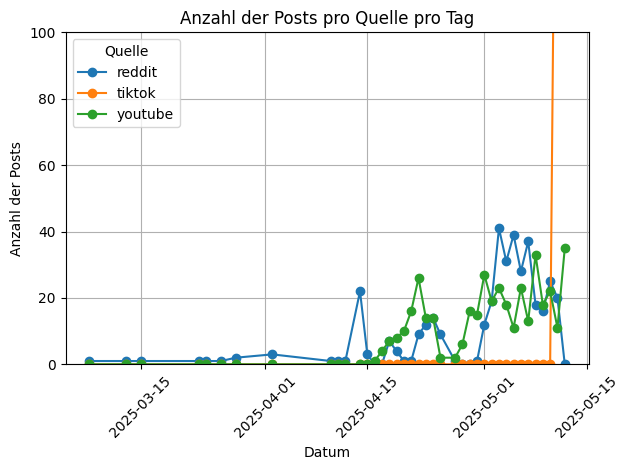

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Datumsspalte sicherstellen (ggf. anpassen)
df['date'] = pd.to_datetime(df['published_at']).dt.date  # Nur das Datum, keine Uhrzeit

# Gruppieren: Anzahl Posts pro Tag und Quelle
daily_counts = df.groupby(['date', 'source']).size().reset_index(name='count')

# Pivotieren für saubere Darstellung
pivot_df = daily_counts.pivot(index='date', columns='source', values='count').fillna(0)

# Plotten
plt.figure(figsize=(12, 6))
pivot_df.plot(kind='line', marker='o')

plt.title('Anzahl der Posts pro Quelle pro Tag')
plt.xlabel('Datum')
plt.ylabel('Anzahl der Posts')
plt.xticks(rotation=45)
plt.legend(title='Quelle')
plt.ylim(0, 100)  # Y-Achse auf 0–100 begrenzen
plt.tight_layout()
plt.grid(True)
plt.show()


# Preparations

In [6]:
# Kombinieren von Titel und Text (beide bereinigt)
texts = (df["title_clean"].fillna("") + " " + df["text_clean"].fillna("")).astype(str)

# LDA
LDA ist ein probabilistisches generatives Modell, das davon ausgeht, dass jedes Dokument eine Mischung aus mehreren Themen ist und jedes Thema durch eine Verteilung über Wörter beschrieben werden kann. Es eignet sich gut für längere, formellere Texte, bietet jedoch auch bei kurzen Texten erste Einblicke in thematische Strukturen.

Warum LDA als erster Ansatz?
Einfachheit & Transparenz: LDA ist leicht verständlich und bietet eine gute Grundlage, um Themenmodelle zu interpretieren.

Vergleichsbasis: Es dient als Referenzmodell, gegen das modernere Verfahren wie BERTopic verglichen werden können.

Schnelle Anwendung: Mit scikit-learn lässt sich LDA effizient auf vorbereiteten TF-IDF-Daten trainieren

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# CountVectorizer ohne Stopwords (da vorher entfernt)
vectorizer = CountVectorizer(
    max_df=0.95,
    min_df=2
)

# Textmatrix erzeugen
X = vectorizer.fit_transform(texts)  # texts = bereits bereinigte Texte

# LDA-Modell definieren
lda_model = LatentDirichletAllocation(
    n_components=9,         # Anzahl der Themen
    max_iter=3,
    learning_method='online',
    random_state=42
)

# LDA-Modell trainieren
lda_model.fit(X)


LatentDirichletAllocation(learning_method='online', max_iter=3, n_components=9,
                          random_state=42)

In [8]:
# Funktion zum Anzeigen der Themen mit Top-Wörtern
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"🟢 Thema {topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))
        print()

display_topics(lda_model, vectorizer.get_feature_names_out(), 10)


🟢 Thema 1:
instagram youtube video league de dazn facebook twitter vs highlights

🟢 Thema 2:
time like game life go work new love since baby

🟢 Thema 3:
people pf official two part pts pm different nbsp stl

🟢 Thema 4:
real support world months link guys summer content story performance

🟢 Thema 5:
said even make right people say see let music better

🟢 Thema 6:
like one would get know told got back could want

🟢 Thema 7:
media oblivion vi funk social voice papst leben elder kids

🟢 Thema 8:
wig last weekend wife fox gift style party mom posted

🟢 Thema 9:
tiktok mehr folge geht instagram beim immer facebook findet by



## 1. Fortgeschrittenes Topic Modelling mit BERTopic

Das klassische LDA-Verfahren ist oft ungeeignet für kurze, informelle Texte. BERTopic nutzt Embeddings + Clustering + TF-IDF, um deutlich robustere und interpretierbare Themen zu erzeugen. Zudem unterstützt BERTopic die Analyse von Themen im Zeitverlauf.

In [9]:
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
from sentence_transformers import SentenceTransformer

# Für deutschsprachige Texte kann ein mehrsprachiges Modell hilfreich sein
embedding_model = SentenceTransformer('all-MiniLM-L6-v2')  # oder 'paraphrase-multilingual-MiniLM-L12-v2'

# Daten vorbereiten
texts = df['text_clean'].dropna().tolist()

# BERTopic initialisieren und trainieren
topic_model = BERTopic(embedding_model=embedding_model, language='multilingual')
topics, probs = topic_model.fit_transform(texts)

df_clean = df.loc[df['text_clean'].notna()].copy()
df_clean['topic'] = topics

topic_model.get_topic_info()

c:\Users\SofiePischl\Documents\01_HdM\10_ML_OPS\TrendAnalyseSocialMedia\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,Topic,Count,Name,Representation,Representative_Docs
0,-1,613,-1_instagram_music_youtube_max,"[instagram, music, youtube, max, follow, news,...",[michael x jonas abchecken icon league team fo...
1,0,324,0_said_like_told_would,"[said, like, told, would, time, even, people, ...",[f three children ex kon months ago sister f c...
2,1,191,1_instagram_video_tiktok_werbung,"[instagram, video, tiktok, werbung, youtube, k...",[deutsche memes folge quellen folgt insta dank...
3,2,120,2_wait_love_part_omg,"[wait, love, part, omg, end, funny, laugh, des...","[wait, wait, wait end]"
4,3,61,3_than_wurde_naja_ist,"[than, wurde, naja, ist, stronger, danke, imme...",[gilts mindestens zwei freunde mitnehmen wahll...
5,4,51,4_que_de_em_não,"[que, de, em, não, os, para, quando, ou, uma, ...",[que encontro maravilhoso provando que os quad...
6,5,46,5_pf_pts_nbsp_ast,"[pf, pts, nbsp, ast, blk, stl, min, reb, team,...",[gsw min box scores nba yahoo nbsp game summar...
7,6,45,6_league_dazn_highlights_sport,"[league, dazn, highlights, sport, uefa, sky, c...",[königlichen gast beim tabellenzwöflten getafe...
8,7,43,7_في_على_من_اللي,"[في, على, من, اللي, انا, لا, الدنيا, official,...",[بسبب التزاحم الشديد في الطوابير أطفال يبكون و...
9,8,40,8_ronaldo_shape_football_messi,"[ronaldo, shape, football, messi, goal, mgk, t...","[prime ronaldo, redick notes players phenomena..."


In [10]:
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
from sentence_transformers import SentenceTransformer
from hdbscan import HDBSCAN
import nltk
nltk.download('stopwords')  # Nur beim ersten Mal nötig

from nltk.corpus import stopwords

# Schritt 1: Besseres Embedding-Modell (wenn mehrsprachig)
embedding_model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')

custom_stopwords = ['like', 'said', 'instagram', 'video', 'follow', 'people', 'know', 'thing', 'tiktok', 'every', 'max']

# Schritt 2: Besserer Vectorizer
vectorizer_model = CountVectorizer(
    stop_words=custom_stopwords + stopwords.words("english"),
    ngram_range=(1, 2),
    min_df=2
)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SofiePischl\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:

# Schritt 3: Optional – feinjustierter Clusterer
hdbscan_model = HDBSCAN(min_cluster_size=12, min_samples=1,  metric='euclidean',
    cluster_selection_method='eom')

# Schritt 4: Topic-Modellierung
topic_model = BERTopic(
    embedding_model=embedding_model,
    vectorizer_model=vectorizer_model,
    hdbscan_model=hdbscan_model,
    min_topic_size=3,
     top_n_words=10,
    language='multilingual'
)


In [12]:

# Schritt 5: Training
texts = df['text_clean'].dropna().tolist()
topics, probs = topic_model.fit_transform(texts)

# Schritt 6: Optionale bessere Labels
topic_model.generate_topic_labels(nr_words=5, topic_prefix=False)

df_en = df[df['text_language'] == 'en']

# Schritt 7: Ergebnisse zurückschreiben
df_clean = df.loc[df['text_clean'].notna()].copy()
df_clean['topic'] = topics


In [13]:
topic_info = topic_model.get_topic_info()
display(topic_info)

,Topic,Count,Name,Representation,Representative_Docs
0,-1,573,-1_back_get_go_money,"[back, get, go, money, one, would, time, de, g...",[whether want admit pretty privilege thing som...
1,0,93,0_mehr_dabei_geht_kanal,"[mehr, dabei, geht, kanal, gerne, funk, rabatt...",[geil diggi glänzt auto neu produkte nutzen al...
2,1,62,1_music_production_assistant_producer,"[music, production, assistant, producer, direc...",[txt 투모로우바이투게더 love language official mv credi...
3,2,55,2_work_company_unity_ai,"[work, company, unity, ai, boss, email, day, t...",[work digital marketing company thinks google ...
4,3,55,3_summer_welcome_ready_getting ready,"[summer, welcome, ready, getting ready, danke,...","[welcome danke, getting ready hour red eye fli..."
5,4,52,4_yamal_king_foreigner_leo,"[yamal, king, foreigner, leo, neu, among, dad,...",[eviticus niv foreigner resides among land mis...
6,5,48,5_على_لا_naja_انت,"[على, لا, naja, انت, يا, من, att, remember, bo...",[längtar efter att få visa er alla möbler sen ...
7,6,46,6_song_merlin_dino_brainrot,"[song, merlin, dino, brainrot, ne, te, mi, mov...",[italian brainrot song brainrot movie tragic t...
8,7,42,7_trump_country_americans_fuck,"[trump, country, americans, fuck, public, news...",[needed get president alone april financial ma...
9,8,42,8_werbung_twitch_twitter_bezahlt,"[werbung, twitch, twitter, bezahlt, link, disc...",[deutsche memes folge quellen folgt insta dank...


In [14]:
import re

topic_info = topic_model.get_topic_info()

def is_junk_topic(row):
    rep = " ".join(row['Representation']) if isinstance(row['Representation'], list) else str(row['Representation'])
    # Nur Sonderzeichen oder zu kurz
    return (
        len(rep) < 10 or
        re.fullmatch(r'[\W\d\s,]+', rep) is not None or
        len(rep.split()) < 2  # z. B. nur ein Token
    )

# Liste schlechter Topics
junk_topics = topic_info[topic_info.apply(is_junk_topic, axis=1)]['Topic'].tolist()

df_filtered = df_clean[~df_clean['topic'].isin(junk_topics)]

In [15]:
texts_filtered = df_filtered['text_clean'].tolist()

from bertopic import BERTopic

topic_model_filtered = BERTopic(
    embedding_model=embedding_model,
    vectorizer_model=vectorizer_model,
    hdbscan_model=hdbscan_model,
    min_topic_size=5,
    top_n_words=10,
    language="multilingual"
)

topics_filtered, _ = topic_model_filtered.fit_transform(texts_filtered)

topic_model_filtered.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,485,-1_money_back_one_would,"[money, back, one, would, get, youtube, make, ...",[comment linked posts op original post u ok ho...
1,0,127,0_dc_على_لا_que,"[dc, على, لا, que, antwort, naja, انت, ou, des...","[dc, انا لا اتغير على احد ولا احقد على احد, عل..."
2,1,94,1_jest_tak_ze_że,"[jest, tak, ze, że, tym, nie, ale, po, aura, na]",[badania wykazują że nawet społeczeństwa myli ...
3,2,72,2_music_production_assistant_producer,"[music, production, assistant, producer, direc...",[txt 투모로우바이투게더 love language official mv credi...
4,3,65,3_tung_tung tung_sahur_tung sahur,"[tung, tung tung, sahur, tung sahur, un, și, m...","[tung tung tung sahur edit, tung tung tung tun..."
5,4,51,4_husband_told_home_got,"[husband, told, home, got, mom, think, family,...",[two daughters graduated college moved back fi...
6,5,47,5_oblivion_game_new_battle,"[oblivion, game, new, battle, elder, minecraft...",[elder scrolls iv oblivion remastered experien...
7,6,46,6_schnelle_ml_einfach_schnell,"[schnelle, ml, einfach, schnell, schön, el, cl...",[low carb zucchini rolle sooo schnell zubereit...
8,7,44,7_wait_summer_shake_ready,"[wait, summer, shake, ready, getting ready, ti...","[wait, wait, getting ready summer]"
9,8,43,8_trump_country_americans_fuck,"[trump, country, americans, fuck, public, news...",[needed get president alone april financial ma...


In [16]:
topic_model.visualize_documents(texts)

In [24]:
import ollama
import pandas as pd

# topic_info enthält die Spalten: Topic, Name, Representation, Representative_Docs
# Beispiel: topic_info = topic_model.get_topic_info()

def generate_ollama_title(topic_row):
    # Nimm die wichtigsten Wörter und einen Beispiel-Post
    topic_name = topic_row['Name']
    example_doc = topic_row['Representative_Docs'][0] if isinstance(topic_row['Representative_Docs'], list) and len(topic_row['Representative_Docs']) > 0 else ""
    prompt = f"Bitte generiere einen prägnanten, verständlichen Titel für dieses Social-Media-Topic.\nWichtige Begriffe: {topic_name}\nBeispiel-Post: {example_doc}"
    response = ollama.chat(
        model='mistral',
        messages=[{"role": "user", "content": prompt}]
    )
    return response['message']['content']

# Falls die Spalte noch nicht als Liste vorliegt, ggf. umwandeln:
if isinstance(topic_info['Representative_Docs'].iloc[0], str):
    topic_info['Representative_Docs'] = topic_info['Representative_Docs'].apply(eval)

# Titel generieren
topic_info['Ollama_Title'] = topic_info.apply(generate_ollama_title, axis=1)

# Ausgabe
display(topic_info[['Topic', 'Name', 'Ollama_Title']])

KeyboardInterrupt: 

In [25]:
import ollama
import pandas as pd
from joblib import Parallel, delayed
from tqdm import tqdm
import os

# === Schritt 1: Topic Info laden (z. B. von BERTopic) ===
# topic_info = topic_model.get_topic_info()

# Optional: Ergebnisse wiederverwenden
SAVE_PATH = "topics_with_titles.csv"
if os.path.exists(SAVE_PATH):
    topic_info = pd.read_csv(SAVE_PATH)
    print("⏳ Bereits generierte Titel geladen.")
else:
    topic_info = topic_model.get_topic_info()

    # Optional: Umwandlung der Repräsentativen Dokumente, falls String gespeichert ist
    if isinstance(topic_info['Representative_Docs'].iloc[0], str):
        import ast
        topic_info['Representative_Docs'] = topic_info['Representative_Docs'].apply(ast.literal_eval)

    # === Schritt 2: Junk-Topics rausfiltern ===
    topic_info = topic_info[topic_info['Topic'] != -1]  # Outlier-Cluster ignorieren
    topic_info = topic_info.reset_index(drop=True)

    # === Schritt 3: Titel mit Ollama generieren ===
    def generate_ollama_title(topic_row):
        topic_name = topic_row['Name']
        docs = topic_row['Representative_Docs']
        example_doc = docs[0] if isinstance(docs, list) and len(docs) > 0 else ""
        prompt = f"Titel für ein Social-Media-Topic:\nBegriffe: {topic_name}\nBeispiel: {example_doc}"
        try:
            response = ollama.chat(
                model='mistral',
                messages=[{"role": "user", "content": prompt}]
            )
            return response['message']['content'].strip()
        except Exception as e:
            return f"[Fehler: {str(e)}]"

    # Parallelisierung + Fortschrittsbalken
    titles = Parallel(n_jobs=4)(
        delayed(generate_ollama_title)(row)
        for row in tqdm(topic_info.to_dict(orient="records"), desc="🔁 Generiere Topic-Titel mit Ollama")
    )

    topic_info["Ollama_Title"] = titles

    # Ergebnisse speichern
    topic_info.to_csv(SAVE_PATH, index=False)
    print("✅ Generierte Titel gespeichert in:", SAVE_PATH)

# === Schritt 4: Vorschau anzeigen ===
display(topic_info[['Topic', 'Name', 'Ollama_Title']])


🔁 Generiere Topic-Titel mit Ollama: 100%|██████████| 44/44 [55:57<00:00, 76.31s/it] 


✅ Generierte Titel gespeichert in: topics_with_titles.csv


,Topic,Name,Ollama_Title
0,0,0_mehr_dabei_geht_kanal,"Titel für ein Social-Media-Topic:\n""🏎️💨 Turbot..."
1,1,1_music_production_assistant_producer,"🎵🎧 ""Behind the Scenes of BTS's 'Love Language'..."
2,2,2_work_company_unity_ai,💻🚀 #LeadingTheFuture: Embracing AI & Teamwork ...
3,3,3_summer_welcome_ready_getting ready,🌞️ Summer Ready: Let's Share Our Tips on How t...
4,4,4_yamal_king_foreigner_leo,"Titel für ein Social-Media-Topic:\n""Respecting..."
5,5,5_على_لا_naja_انت,إنما تريد معرفة كيف أظهر لك جميع الموبيلات بعد...
6,6,6_song_merlin_dino_brainrot,"🎶 ""#BrainRotChallenge: Share Your Favorite Tra..."
7,7,7_trump_country_americans_fuck,Titel: Wie der Treasury Secretary und der Comm...
8,8,8_werbung_twitch_twitter_bezahlt,📣 Aufruf zur Unterstützung von Alex durch den ...
9,9,9_że_też_się_tak,"🌱💭 ""Imagaine if you were attending a class and..."


## 2. Verbesserte Sentiment-Analyse

Die bisher genutzte Methode (`TextBlob`) ist eher für formellere englische Texte geeignet. Hier ergänzen wir zwei modernere Verfahren:

- **VADER**: speziell für Social Media-Texte (auch kurze Aussagen) konzipiert.
- **Transformer-Modell**: z. B. RoBERTa-basiert, feingetunt für Sentiment-Klassifikation auf Twitter-Daten.

In [ ]:
from transformers import pipeline

# Sentiment-Pipeline laden (Roberta Twitter-Modell)
sentiment_pipeline = pipeline(
    "sentiment-analysis",
    model="cardiffnlp/twitter-roberta-base-sentiment",
    tokenizer="cardiffnlp/twitter-roberta-base-sentiment",
    truncation=True
)

# Einzelne Zeilen durchgehen, um Fehler im Batch zu vermeiden
def safe_sentiment(text):
    try:
        return sentiment_pipeline(text[:512])[0]['label']
    except Exception as e:
        print(f"Fehler bei Text: {text[:100]}... -> {e}")
        return "error"


df_clean['roberta_sentiment'] = df_clean['text_clean'].astype(str).apply(safe_sentiment)

Device set to use cpu
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Fehler bei Text: 𝗙𝗢𝗟𝗘 𝗣𝗨𝗕𝗟𝗜𝗦𝗛𝗜𝗡𝗚 ____________________________ 𝗫𝗵𝗲𝗻𝘀𝗶𝗹𝗮 𝘅 𝗟𝗲𝗱𝗿𝗶 𝗩𝘂𝗹𝗮 𝗠𝗮 𝗞𝘁𝗵𝗲 𝗢𝗳𝗳𝗶𝗰𝗶𝗮𝗹 𝗩𝗶𝗱𝗲𝗼 __________... -> The expanded size of the tensor (582) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 582].  Tensor sizes: [1, 514]
Fehler bei Text: اشترك في قناة حسين الجسمي الرسمية حسين الجسمي فستانك الأبيض استمعوا على جميع المنصات كلمات أمير طعيم... -> The expanded size of the tensor (516) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 516].  Tensor sizes: [1, 514]


## 3. Zeitliche Analyse der Topics

Ein großer Vorteil von BERTopic ist die Möglichkeit, Themen im Zeitverlauf zu analysieren. Dazu müssen wir das Erstellungsdatum korrekt als `datetime` interpretieren und in geeignete Zeitstempel transformieren.

In [ ]:
# Sicherstellen, dass timestamp eine gültige datetime-Spalte ist
df_clean['timestamp'] = pd.to_datetime(df_clean['timestamp'], errors='coerce')
df_clean = df_clean.dropna(subset=['timestamp'])

# Alle Listen synchron extrahieren
texts_synced = df_clean['text_clean'].tolist()
topics_synced = df_clean['topic'].tolist()
timestamps_synced = df_clean['timestamp'].tolist()  # echte datetime-Werte

# Kontrollieren
print(len(texts_synced), len(topics_synced), len(timestamps_synced))

# Topics-over-time berechnen (echte Timestamps → funktioniert!)
topics_over_time = topic_model.topics_over_time(
    docs=texts_synced,
    topics=topics_synced,
    timestamps=timestamps_synced,
    nr_bins=20  # oder eine andere sinnvolle Anzahl Zeit-Buckets
)

# Visualisierung
topic_model.visualize_topics_over_time(topics_over_time)


769 769 769


## 4. Visuelle Exploration mit UMAP

Zur besseren Interpretation der durch BERTopic erzeugten Embeddings und Topics projizieren wir die hochdimensionalen Embeddings in 2D mit **UMAP**. So lassen sich thematische Cluster visuell erkennen.

In [ ]:

# Visualisierung nach Topic
topic_model.visualize_documents(texts, topics=topics)

#  Save

In [ ]:
df_clean.to_csv(RAW_DIR / "social_media_data_with_topics.csv")


In [ ]:
df_clean.head()

,source,id,title,text,username,likes,comments,shares,plays,timestamp,published_at,url,title_language,title_clean,title_char_count,title_word_count,title_uppercase_count,title_exclamation_count,title_question_count,title_emoji_count,title_mention_count,title_hashtag_count,title_avg_word_length,title_sentiment,title_sentiment_score,text_language,text_clean,text_char_count,text_word_count,text_uppercase_count,text_exclamation_count,text_question_count,text_emoji_count,text_mention_count,text_hashtag_count,text_avg_word_length,text_sentiment,text_sentiment_score,engagement_rate,hour,weekday,year,month,day_period,is_weekend,topic,roberta_sentiment
1427,youtube,"#AborandTynna #OfficialMusicVideo #Baller""",Abor & Tynna,2025-05-08T18:00:06Z,234565,0.0,0.0,0.017715,0.000002,2025-05-12 13:56:29,2025-05-12 13:56:29,NaN,cy,abor tynna,10.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,4.5,neutral,0.0,de,t z,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,neutral,0.0,0.0,13.0,Monday,2025.0,5.0,afternoon,False,9,LABEL_1
1428,youtube,"#Asche #Kollegah #BisHierLiefAllesNochGut""",Asche,2025-05-08T22:00:07Z,127947,0.0,0.0,0.017715,0.000003,2025-05-12 13:56:29,2025-05-12 13:56:29,NaN,de,asche,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,neutral,0.0,de,t z,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,neutral,0.0,0.0,13.0,Monday,2025.0,5.0,afternoon,False,9,LABEL_1
1429,youtube,"#MileyCyrus #MoretoLose #SomethingBeautiful""",MileyCyrusVEVO,2025-05-09T04:00:07Z,1029912,0.0,0.0,0.017715,0.000015,2025-05-12 13:56:29,2025-05-12 13:56:29,NaN,tr,mileycyrusvevo,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,neutral,0.0,de,t z,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,neutral,0.0,0.0,13.0,Monday,2025.0,5.0,afternoon,False,9,LABEL_1
1430,youtube,"#Oblivion #ArcRaiders #GameTwo #ZDFNeo #rbtv""",Game Two,2025-05-10T10:00:43Z,68615,0.0,0.0,0.017715,0.000002,2025-05-12 13:56:29,2025-05-12 13:56:29,NaN,en,game two,8.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5,negative,-0.4,de,t z,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,neutral,0.0,0.0,13.0,Monday,2025.0,5.0,afternoon,False,9,LABEL_1
1431,youtube,#ROSÉ_Messy #F1TheAlbum #F1TheMovie #F1 #ROSÉ ...,ROSÉ,2025-05-08T16:00:07Z,7123605,0.0,0.0,0.017715,0.000137,2025-05-12 13:56:29,2025-05-12 13:56:29,NaN,de,rosé,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,neutral,0.0,de,t z,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,neutral,0.0,0.0,13.0,Monday,2025.0,5.0,afternoon,False,9,LABEL_1
